<div style="text-align: center;">
   <font size="5"> 2022年度　数式処理演習　pair試験問題 </font>
</div>
   <div style="text-align: right;">
   <font size="3"> cc by Shigeto R. Nishitani, 2022/11/24実施 </font>
</div>

- file: ~/symbolic_math/22_pair/22_pair_ans.ipynb
- make problem: ruby text_dir/bin/pick_works_from_ans.rb 22_pair/22_pair_ans.ipynb -1 '27' '8 9 10 28 32'

以下の問題を python で解き，LUNA へ提出せよ．LUNA へは ipynb と pdf 形式の２種類を提出すること．


# 問 1 微積分

## 1(a) 関数の概形(15 点)

（テキスト p.144 の図 4.35 の確認)

ガウス関数

\begin{equation*}
y= \exp\left(-\frac{x^2}{2 {\rm sigma}^2}\right)
\end{equation*}

の概形を

```python
sigma = 2
plt.xlim(-10,10)
plt.ylim(-0.5,1.5)
```

で描け．


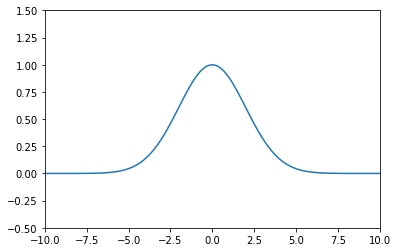

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 100, endpoint=True)
gauss = np.exp(-X**2/2/2**2)

plt.plot(X, gauss)
plt.xlim(-10,10)
plt.ylim(-0.5,1.5)
plt.show()

## 1(b) 関数の積分(15 点)

sympy において，

```python
sigma = symbols('sigma',positive = True)
```

を指定することで，
\begin{equation*}
\int_{-\infty}^{\infty} \exp\left(-\frac{x^2}{2\sigma^2}\right) dx
\end{equation*}
を求めよ．


In [2]:
from sympy import *
x,y = symbols('x y')
sigma = symbols('sigma',positive = True)
integrate(exp(-x**2/2/sigma**2),(x, -oo, oo))

sqrt(2)*sqrt(pi)*sigma

# 問 2 線形代数

## 2(a) 共分散の逆行列(15 点)

ここでは$\Sigma$を共分散とする．
sigma = np.array([[2,1],[1,2]])
の逆行列$\Sigma^{-1}$を求めよ．

さらに検算せよ．


In [1]:
import numpy as np
sigma =np.array([[2,1],[1,2]])
sigma_inv = np.linalg.inv(sigma)
print(sigma_inv)

[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]


In [3]:
np.dot(sigma_inv, sigma)

array([[1., 0.],
       [0., 1.]])

## 2(b) 一般的な 2 次元ガウス関数(15 点)

さらに，sympy で
v = Matrix([x0,x1])
として，
$v^{T} \Sigma^{-1} v$を求めよ．

得られた式を$\exp$の指数部に入れて規格化した関数の 3d プロットは以下の通りとなる（テキストp.150, 図4.37）

注意 ：： 配列同士の内積にはテキストでは，
numpy.matmulのoperator　’＠’を使っている．
2次元配列(行列)の内積では，　numpy.dotから呼び出され同じ結果を返す．
マニュアルではmatmulの使用を推奨している( https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot )．

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gauss(x0, x1, mu, sigma):
    x = np.array([x0,x1])
    a=1/(2*np.pi)*1/(np.linalg.det(sigma) ** (1/2))
    inv_sigma = np.linalg.inv(sigma)
    y=a * np.exp(
        (-1/2)*(x-mu).T @ inv_sigma @(x-mu))
    return y

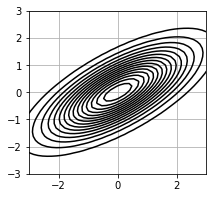

In [6]:
mu=np.array([0,0])
sigma =np.array([[2,1],[1,1]])
x0_min, x0_max = -3,3
x1_min, x1_max = -3,3

x0_n, x1_n = 40, 40
x0 =np.linspace(x0_min,x0_max, x0_n)
x1 =np.linspace(x1_min,x1_max, x1_n)

f = np.zeros((x1_n, x0_n))
for i0 in range(x0_n):
    for i1 in range(x1_n):
        f[i1,i0] = gauss(x0[i0],x1[i1], mu, sigma)
xx0, xx1 = np.meshgrid(x0,x1)

plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
cont = plt.contour(xx0, xx1, f, levels=15, colors="black")
plt.grid()


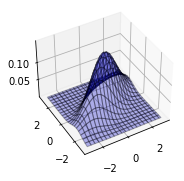

In [7]:
ax =plt.subplot(1,2,2, projection="3d")
ax.plot_surface(
    xx0, xx1, f,
    rstride =2, cstride =2, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_zticks([0.05, 0.10])
ax.view_init(40,-120)
plt.show()

In [8]:
from sympy import *

x0,x1 = symbols('x0 x1')
xx = Matrix([x0, x1])
expand((xx.T * sigma_inv * xx)[0])

0.666666666666667*x0**2 - 0.666666666666667*x0*x1 + 0.666666666666667*x1**2

# 問 3 センター試験原題(20 点)

(2020 大学入試センター試験　数学 II・B/追試験 第 2 問)

$a, b, c$ を実数とし，
関数$f(x)=x^3 -1$, $g(x) = x^3+ax^2+bx+c$を考える．
座標平面上の曲線$y=f(x)$を$C_1$とし,
曲線$y=g(x)$ を$C_2$とする．
$C_2$は点 A(-1,-2)を通り，
$C_2$の A における接線は
$C_1$の A における接線と一致するものとする．

(1) 曲線$C_1$の点 A における接線を$l$とする．
$f'(-1) = \fbox{ ア }$により，
$l$の方程式は
$y=\fbox{ イ }x + \fbox{ ウ }$である．
また，原点 O の直線$l$の距離は
$\frac{\sqrt{\fbox{ エオ }}}{\fbox{ エオ }}$である．

ヒント：問４での数値改変に備えて，x0=-1, y0=f.subs({x:x0})として問題を解いていけ．


In [9]:
from sympy import *

a,b,c,x = symbols('a b c x')
f=x**3-1
g=x**3+a*x**2+b*x+c

In [10]:
x0=-1 #1/2
y0=f.subs({x:x0})
print(x0,y0)

-1 -2


In [11]:
k = diff(f,x).subs({x: x0})

In [12]:
k*(x-x0)+y0

3*x + 1

In [13]:
(1)/sqrt(3**2+(-1)**2)

sqrt(10)/10

(2) 曲線$C_2$の点 A における接線は(1)の直線$l$と一致しているので，
$g'(-1) = \fbox{ カ }$である．
したがって，$b,c$を$a$を用いて表すと，
$b=\fbox{ キ }a$, $c= \fbox{ ク }-\fbox{ ケ }$となる．


In [14]:
g_prime=diff(g,x).subs({x:x0})
print(g_prime)
s1 = solve(g_prime-k, b)[0]
print(s1)

-2*a + b + 3
2*a


In [15]:
s2 = solve(g.subs({x:x0}).subs({b:s1})-y0,c)[0]
print(s2)

a - 1


(3) $a=-2$のとき，関数$g(x)$は
$\frac{\fbox{ コサ }}{\fbox{ シ }}$で極大値
$\frac{\fbox{ スセソ }}{\fbox{ タチ }}$をとり，
$\fbox{ ツ }$で極小値
$\fbox{ テトナ }$をとる．

## 解答注意
- 極大値は浮動小数点数でも良い．(分数で出したかったらRationalを使え)
- $\fbox{ ア }, \fbox{ イ }, \fbox{ ウ }, \ldots$ を明示する(あるいは書き出す)必要はない．
- 以下は関数$f(x), g(x: a=-2, x0=-1)$のplotである．解答の検算の参考とせよ．

In [16]:
g_curve = g.subs({b:s1}).subs({c:s2}).subs({a:-2})
print(g_curve)

x**3 - 2*x**2 - 4*x - 3


In [17]:
solve(diff(g_curve,x),x)

[-2/3, 2]

In [18]:
g_curve.subs({x:2})

-11

In [19]:
g_curve.subs({x:-Rational(2,3)})

-41/27

(4) 以下は問題の最後までやった場合の答案です．参考までに．

$a<0$とする．
$-2 \leqq x \leqq -1$において，
曲線$C_1$と$C_2$および直線$x=-2$で囲まれた図形の面積を$S_1$とする．
また，
$-1 \leqq x \leqq 1$において，
曲線$C_1$と$C_2$および直線$x=1$で囲まれた図形の面積を$S_2$とする．
このとき，$S=S_1+S_2$とおくと，
$S= \fbox{ ヌネ }a$となる．


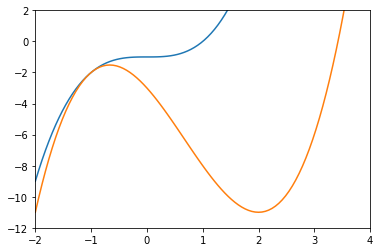

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

g_curve = x**3 - 2*x**2 - 4*x - 3
xx_n = 100
xx =np.linspace(-2, 4, xx_n)

gY = np.zeros(xx_n)
fY = np.zeros(xx_n)
for i0 in range(xx_n):
    gY[i0] = g_curve.subs({x:xx[i0]})
    fY[i0] = f.subs({x:xx[i0]})

plt.plot(xx, fY)
plt.plot(xx, gY)
plt.xlim(-2,4)
plt.ylim(-12,2)
plt.show()

In [21]:
integrate(f-g,(x,-2,1)).subs({b:s1}).subs({c:s2})

-3*a

# 問 4 センター試験改変(20 点)

点 A の$x$座標を$-1/2$として同様に求めると，
$a=-2$では$g(x)= x^3 - 2x^2 - 2x - 3/2$となることを確かめよ．

<!--- また，その時でも2つの曲線は$-2 \leqq x \leqq 1$で交差しないことを確かめよ．--->

さらに, 点 A の$x$座標が$-1.1$で, $a=-2$の時の$g(x)$を求めよ．
f(x)およびg(x; a=-2, x0=-1.1)を同時プロットすると以下の通りとなる．

In [9]:
from sympy import *
a,b,c,x = symbols('a b c x')
f=x**3-1
g=x**3+a*x**2+b*x+c
x0=-1/2
y0=f.subs({x:x0})
print('x0, y0= %5.3f, %10.5f' % (x0,y0))
k = diff(f,x).subs({x: x0})
print('k = %5.3f' %k)
k*(x-x0)+y0

g_prime=diff(g,x).subs({x:x0})
print("g_prime:", g_prime)
s1 = solve(g_prime-k, b)[0]
print(s1)
s2 = solve(g.subs({x:x0}).subs({b:s1})-y0,c)[0]
print(s2)
g_curve = g.subs({b:s1}).subs({c:s2}).subs({a:-2})
print("g_curve: ", g_curve)

x0, y0= -0.500,   -1.12500
k = 0.750
g_prime: -1.0*a + b + 0.75
a
0.25*a - 1.0
g_curve:  x**3 - 2*x**2 - 2*x - 1.5


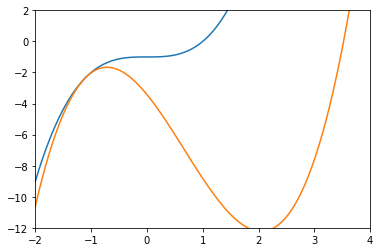

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xx_n = 100
xx =np.linspace(-2, 4, xx_n)

gY = np.zeros(xx_n)
fY = np.zeros(xx_n)
for i0 in range(xx_n):
    gY[i0] = g_curve.subs({x:xx[i0]})
    fY[i0] = f.subs({x:xx[i0]})

plt.plot(xx, fY)
plt.plot(xx, gY)
plt.xlim(-2,4)
plt.ylim(-12,2)
plt.show()

In [24]:
g.subs({x:x0}).subs({b:s1}).subs({c:s2}).subs({a:-2})

-2.33100000000000

In [25]:
diff(g,x).subs({x:x0}).subs({b:s1}).subs({c:s2}).subs({a:-2})

3.63000000000000